In [99]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

#### **Problem 1** Where is the 5 $\sigma$ threshold limit?

In [100]:
# Creating Background Data
np.random.seed(123)
bckg = stats.poisson.rvs(100,size = 1000000)

#5 Sigma Measurement
prob_5sigma = stats.norm.cdf(5)
measurement = stats.poisson.ppf(prob_5sigma,100)

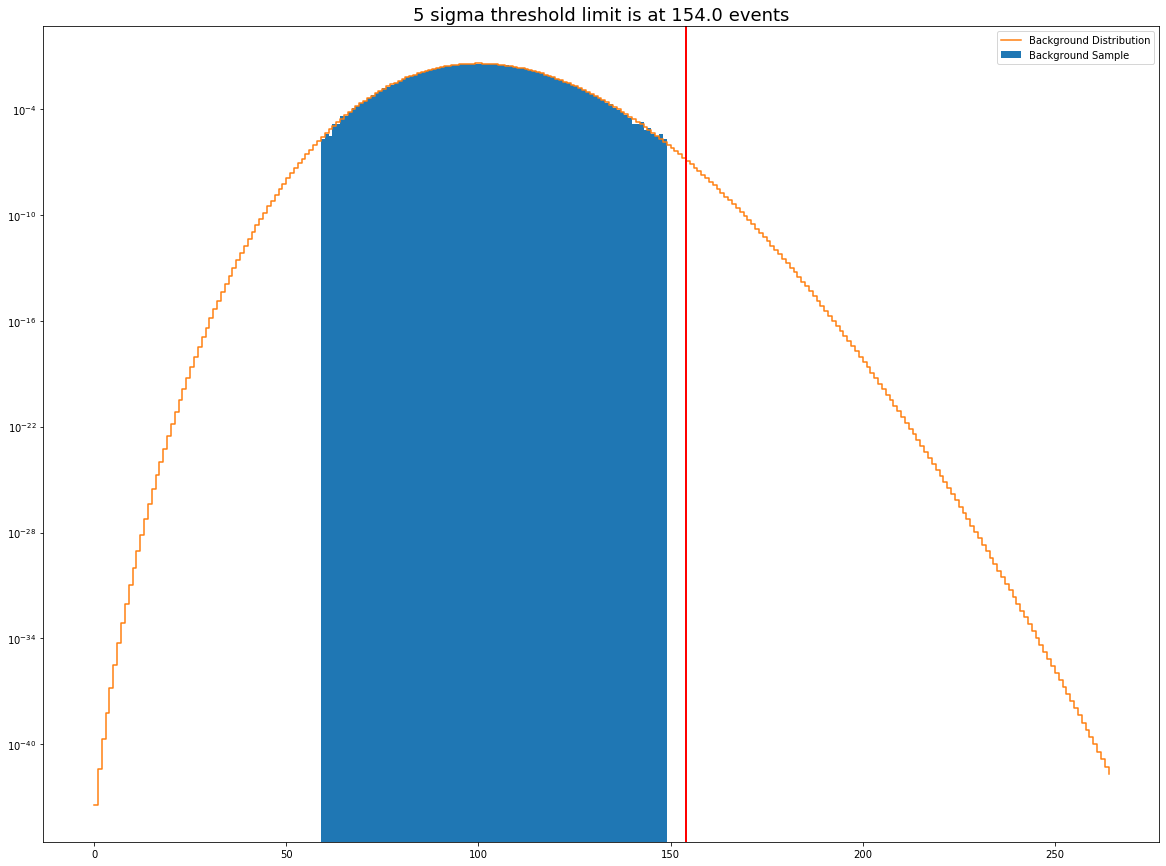

In [101]:
#Plotting Histograms
np.random.seed(123)
x = range(0,265)
plt.hist(bckg,bins = range(50,155),density = True, label = 'Background Sample')
plt.step(x,stats.poisson.pmf(x,100),where = 'post', label = 'Background Distribution')
plt.axvline(measurement,Linewidth = 2,color='red')
plt.yscale('log')
plt.title('5 sigma threshold limit is at ' + str(measurement) + ' events', Fontsize = 18)
plt.legend()
plt.show()

#### **Problem 2** Inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30 $\sigma$ range. Inject this signal into your background data many times.

In [102]:
#Finding the sigma of 250 events
np.random.seed(123)
measurement_prob = stats.poisson.sf(250,100)
sigma = stats.norm.isf(measurement_prob)
print('probability of measuring 250 events is',measurement_prob,'which corresponds to a',sigma,'sigma event')

#Generating 3000 events and injecting into the background
signal = 250 + stats.poisson.rvs(100, size = 3000)
data = np.append(signal,bckg)

probability of measuring 250 events is 7.587806695339081e-37 which corresponds to a 12.626023118889883 sigma event


#### **a)** Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

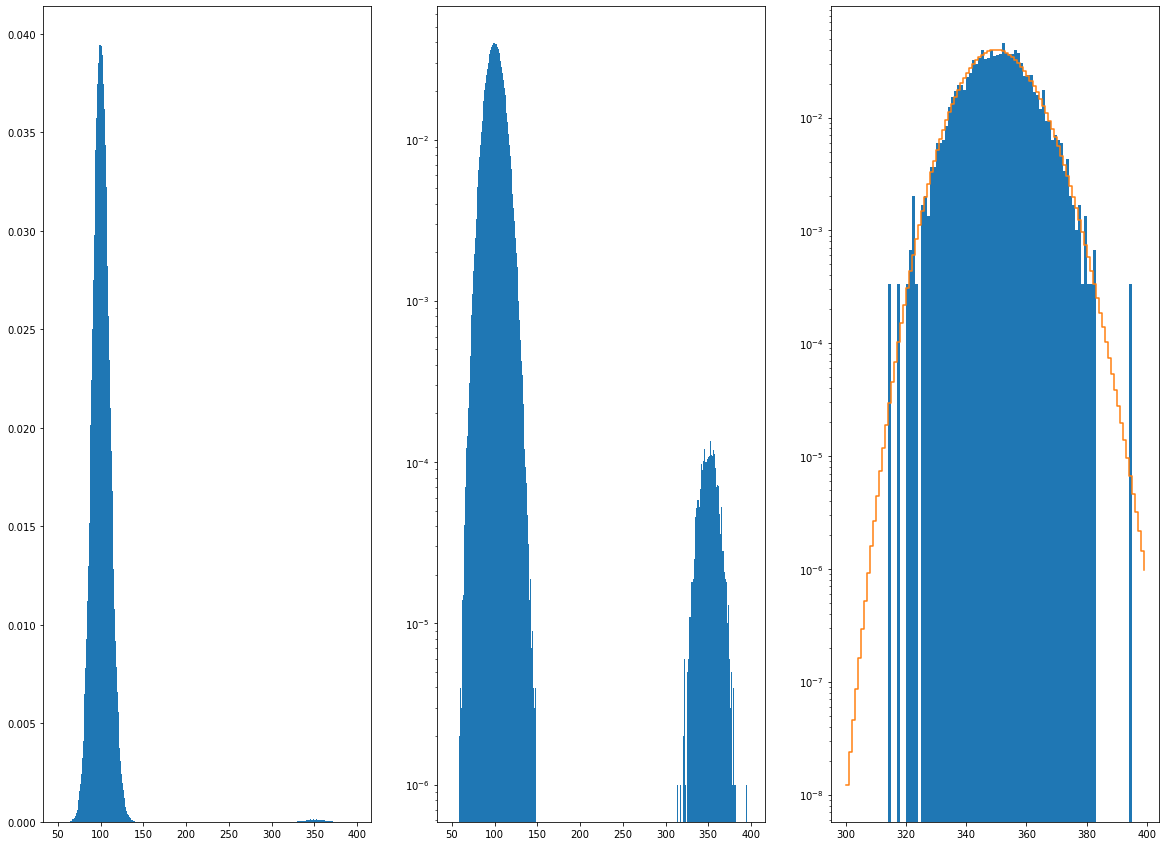

In [103]:
np.random.seed(123)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.hist(data,bins = range(50,400),density = True)
ax2.hist(data,bins = range(50,400),density = True)
ax2.set_yscale('log')
signal_hist = ax3.hist(signal,bins = range(300,400),density = True)
ax3.set_yscale('log')
x2 = range(300,400)
ax3.step(x2,stats.poisson.pmf(x2,100,loc=250),where = 'post')
plt.show()

The histogram shows us that the signal is much stronger than the background and is poisson distributed. It also seems to have the same variance as the background and is just shifted, meaning that the signal has little variation.
#### **b)** Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?
The observed signal is biased, the observed value is more likely to be stronger than the injected signal, as the background events skew towards a higher number. It is not symmetric. It is more likely that the signal is observed higher than the mean than it is to be observed below the mean.

In [104]:
np.random.seed(123)
print('probability lower =',stats.poisson.cdf(350,100,loc = 250))
print('probability higher =',stats.poisson.sf(350,100,loc = 250))
probs = signal_hist[0]
vals = signal_hist[1][:-1]
print('probability lower =',stats.poisson.cdf(350,100,loc = 250)-stats.poisson.cdf(345,100,loc = 250))
print('probability higher =',stats.poisson.sf(350,100,loc = 250)-stats.poisson.sf(355,100,loc = 250))

probability lower = 0.5265621985299985
probability higher = 0.47343780147000153
probability lower = 0.19537046449469203
probability higher = 0.186245683888543


#### **Problem 3**

In [105]:
np.random.seed(123)
sig = 0
c = 400
while sig < 30:
    c +=1
    sig = stats.norm.isf(stats.poisson.sf(c,100))
print('sigma of',str(c),'events:', stats.norm.isf(stats.poisson.sf(c,100)))

sigma of 527 events: 30.00252878811436


In [106]:
np.random.seed(123)
signal2 = stats.randint.rvs(0,527,size = 1000000)
data2 = signal2 + stats.poisson.rvs(100, size = 1000000)
print(np.max(data2),np.min(data2))
print(np.max(signal2),np.min(signal2))

664 67
526 0


#### **a)** Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data
I am simulating a uniformly distributed number of events as a signal added to the background distribution. The signal is anywhere from 0 to 527 events with equal probability. This was added to the regular background distribution

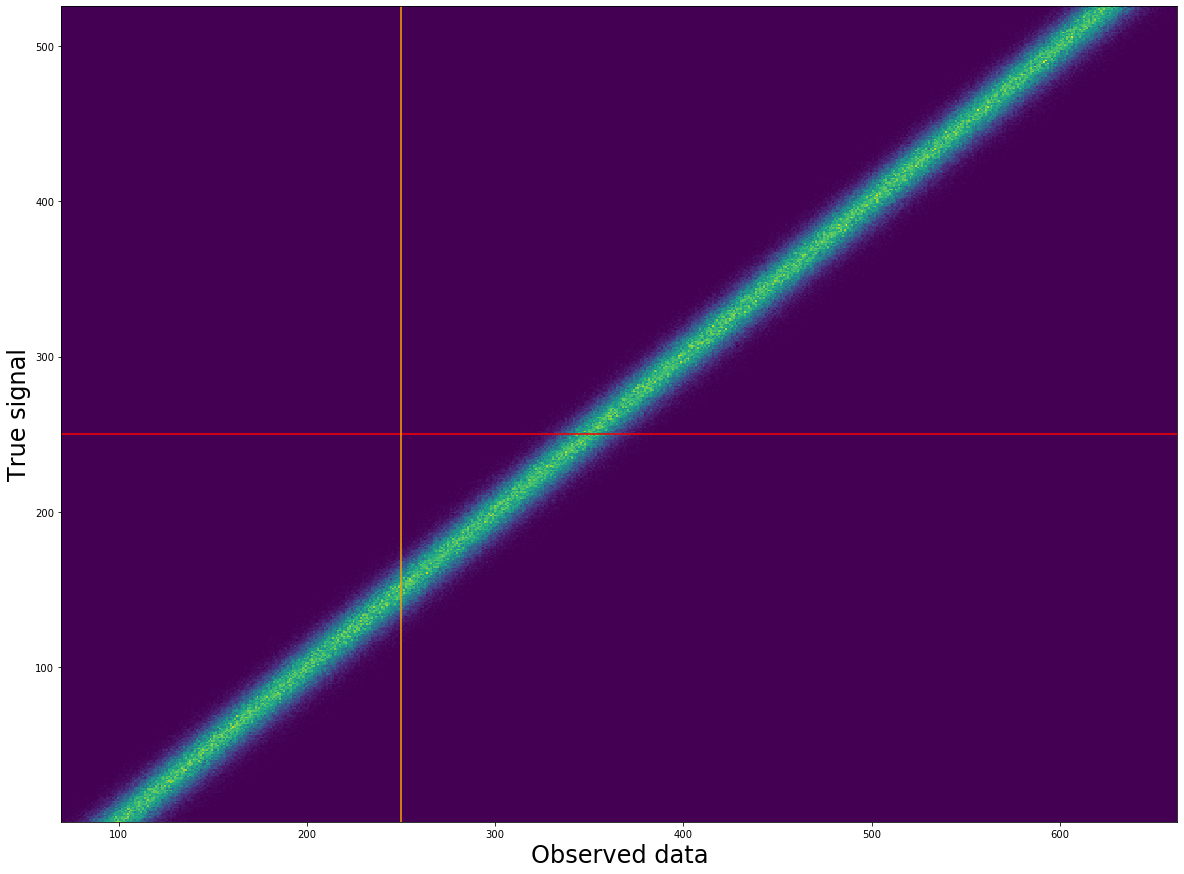

In [107]:
signaledges = np.array(range(0,527))
dataedges = np.array(range(69,664))

Psd, temp, temp2= np.histogram2d(data2,signal2, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal', fontsize = 24)
plt.xlabel('Observed data', fontsize = 24)

plt.axhline(signaledges[250],color = 'red')
plt.axvline(dataedges[181],color = 'orange')
plt.show()

#### **b)** For the same injected signal power as in problem 2, show that you get the same answer.

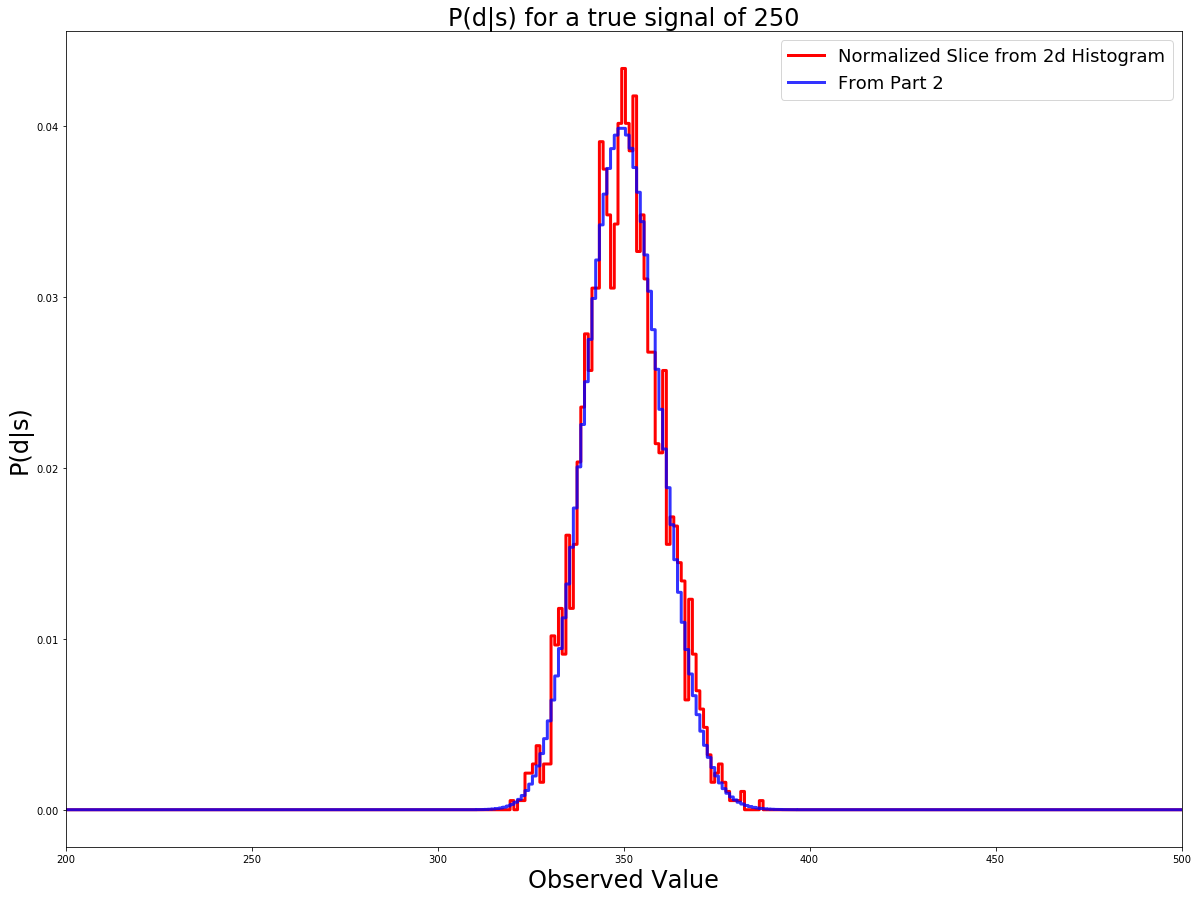

In [108]:
np.random.seed(123)
plt.step(datacenters,Psd[:,250]/np.sum(Psd[:,250]),Linewidth = 3, color = 'red',label = 'Normalized Slice from 2d Histogram')
plt.step(datacenters,stats.poisson.pmf(temp[:-1],100,loc=250),Linewidth = 3,alpha = 0.8,color = 'blue', label = 'From Part 2')
plt.legend(loc = 0 ,fontsize = 18)
plt.title('P(d|s) for a true signal of ' + str(signaledges[250]),fontsize = 24)
plt.xlabel('Observed Value',fontsize = 24)
plt.ylabel('P(d|s)',fontsize = 24)
plt.xlim([200,500])
plt.show()

There is some signal variation that can be explained by sample variation, but the curves are very similar.
#### **c)**  Now reverse the problem, select an observed data value and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

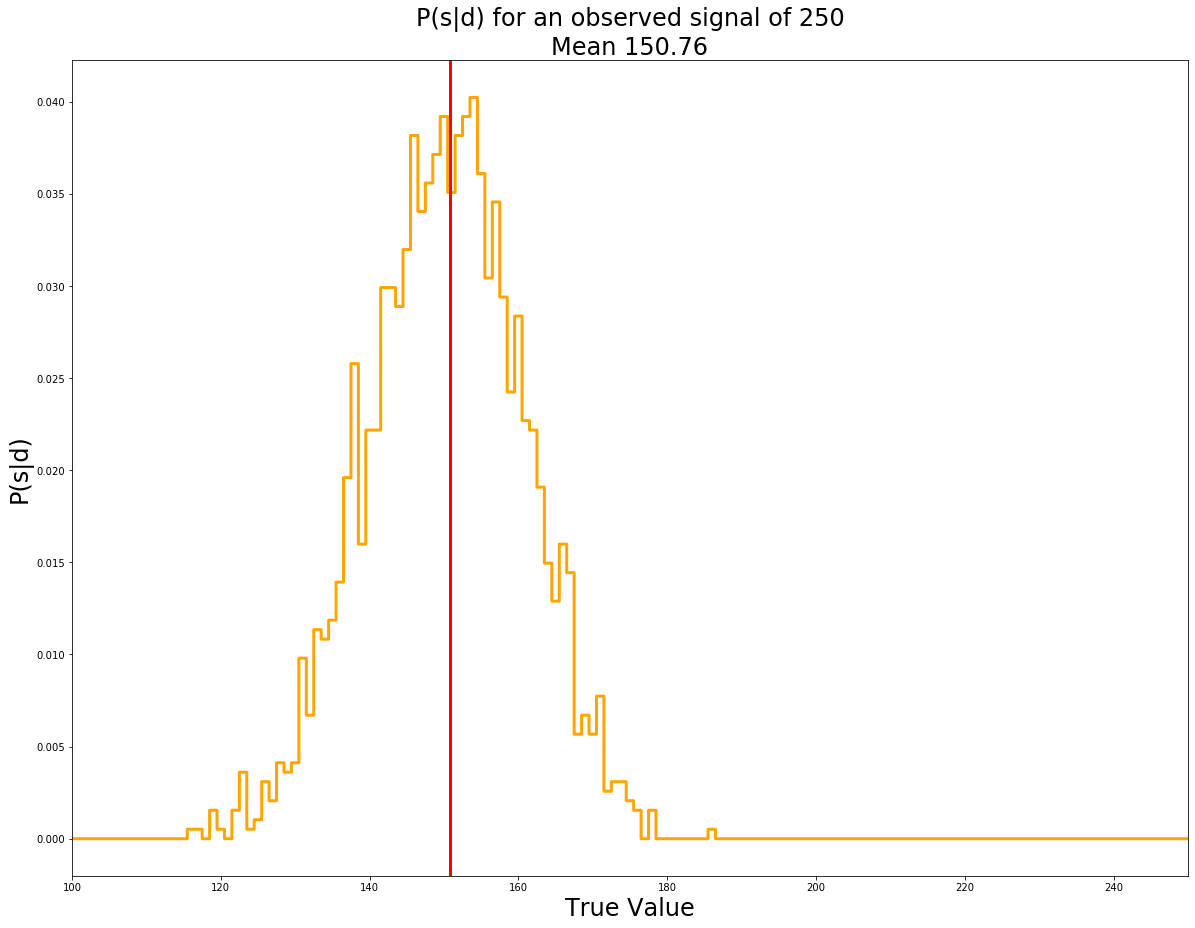

In [109]:
plt.step(signalcenters,Psd[181,:]/np.sum(Psd[181,:]),Linewidth = 3, color = 'orange')
mean = np.sum(signalcenters*Psd[181,:]/np.sum(Psd[181,:]))
plt.axvline(mean,Linewidth = 3, color = 'red')
plt.title('P(s|d) for an observed signal of ' + str(dataedges[181]) + '\nMean ' + str(np.round(mean,2)) ,fontsize = 24)
plt.xlabel('True Value',fontsize = 24)
plt.ylabel('P(s|d)',fontsize = 24)
plt.xlim([100,250])
plt.show()

This histogram shows that when you observe 250 events, the distribution that describes the distribution of true signals that could have cause that observed signal. This distribution is centered around 150-151 events and appears to be poisson distributed.
#### **d)** For your observed signal, what is the $1\sigma$  uncertainty on the true signal strength?

1 Sigma Confidence Interval Bounds: [140.5, 161.5]


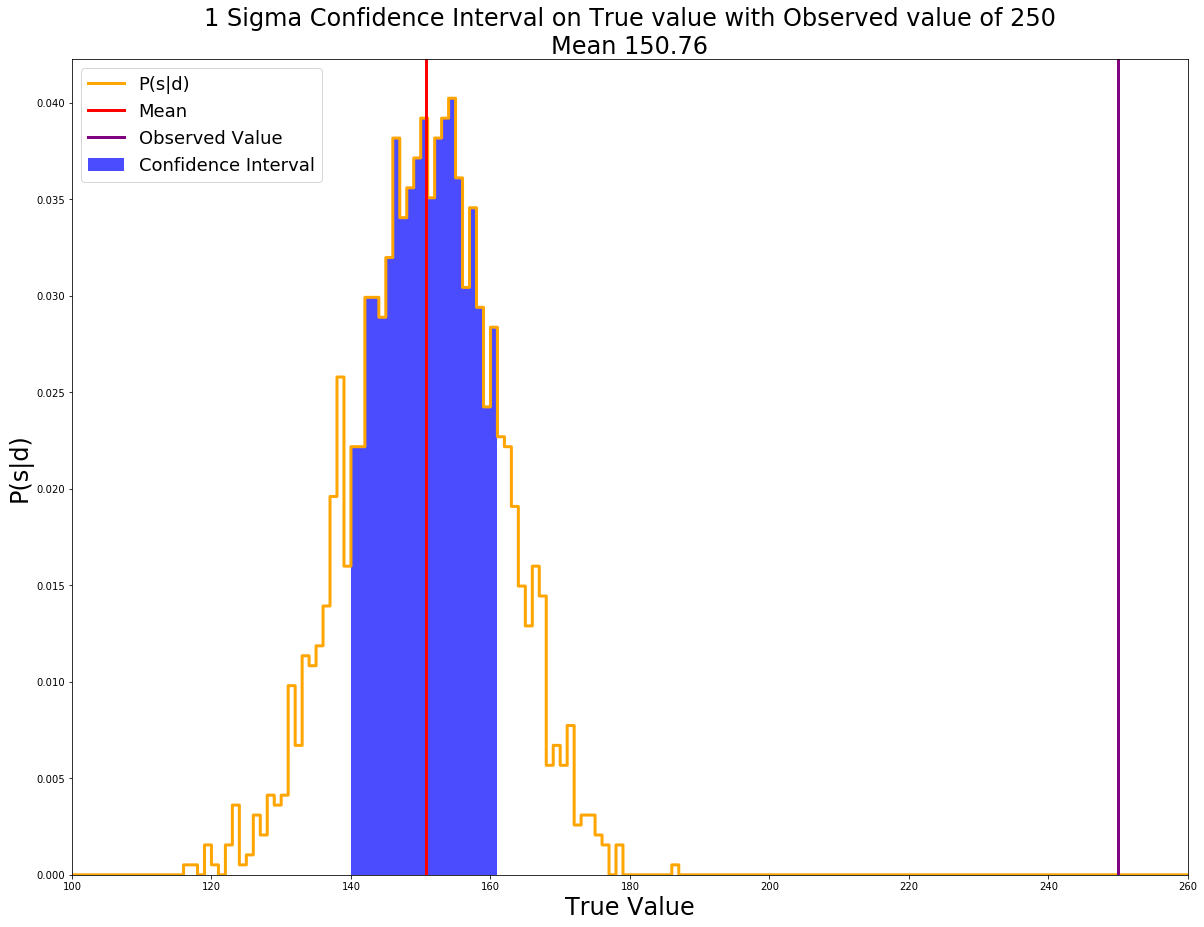

In [110]:
upper = 0
lower = 0
bound = [0,0]
density = Psd[181,:]/np.sum(Psd[181,:])
boundary = stats.norm.sf(1)
for j in range(0,526):
    upper +=density[-j]
    if upper >= boundary:
        bound[1] = signalcenters[-j]
        break
for k in range(0,526):
    lower +=density[k]
    if lower >= boundary:
        bound[0] = signalcenters[k]
        break
print('1 Sigma Confidence Interval Bounds:', bound)
plt.step(signalcenters,density,Linewidth = 3, color = 'orange',where = 'mid', label = 'P(s|d)')
plt.bar(signalcenters[k:-j],density[k:-j],width = 1,color = 'blue',alpha = 0.7, label = 'Confidence Interval')
plt.axvline(mean,Linewidth = 3, color = 'red', label = 'Mean')
plt.axvline(250,Linewidth = 3, color = 'purple',label = 'Observed Value')
plt.xlim([100,260])
plt.title('1 Sigma Confidence Interval on True value with Observed value of ' + str(dataedges[181]) + '\nMean ' + str(np.round(mean,2)) ,fontsize = 24)
plt.xlabel('True Value',fontsize = 24)
plt.ylabel('P(s|d)',fontsize = 24)
plt.legend(loc = 0 ,fontsize = 18)
plt.show()

In [98]:
np.random.seed(123)
print(np.round(mean-bound[0],3),np.round(bound[1]-mean,3))
print('Confidence interval drawn from a poisson distribution centered at 150:')
print('[',stats.poisson.isf(boundary,mu = 150.5), stats.poisson.ppf(stats.norm.cdf(-1),mu = 150.5),']')

10.26 10.74
Confidence interval drawn from a poisson distribution centered at 150:
[ 163.0 138.0 ]


#### **e)** Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?
The confidence interval was found numerically using the sample generated. This means that the bounds can only be defined by the bins used in the 2D histogram. The confidence interval is not symmetric, but the difference from the mean is less than half the width of a bin. When the confidence interval was found with a poisson distribution with mean 150 it was symmetric, so the difference from the numerically found confidence interval can be explained by random sample variation. The true value histogram is biased to be lower than the observed value. This makes sense because the background events skew the observed value to be higher than the signal value. This means that we can exped the true value to be lower than the observed value, and be symmetrically distributed.